# -***Legacy Model***-

## XGBoost with One-Hot Encoding (pandas.get_dummies)

This notebook documents the legacy version of my vehicle price prediction project, where I initially used XGBoost with one-hot encoding to handle categorical features. The goal of this notebook is to showcase the original model and its implementation as part of my learning journey. While working on this project, I encountered a few challenges related to the model's handling of data, particularly during dashboard creation.

As I delved deeper into the workings of XGBoost, I discovered that XGBoost has an option for handling categorical data natively, which significantly improved my model's efficiency by reducing the number of features from around 3,000 to just 7. This sparked further research into categorical-specific models, leading me to explore CatBoost and LightGBM. Ultimately, LightGBM outperformed my legacy XGBoost model in nearly every metric, particularly in terms of generalization.

This notebook provides a comprehensive look at the original XGBoost model using one-hot encoding, offering insight into my initial approach and decisions. It serves as a detailed record of my end-to-end project workflow, demonstrating the skills I developed throughout this process, from model building to deployment preparation.

The focus here is on showcasing my hands-on experience with machine learning models, data preprocessing, and project management, all of which I aim to build on further in a professional setting.

In [ ]:
# Necessary libraries
import pandas as pd
import numpy as np
import itertools
import time
import joblib
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
# Load data
df_cars = pd.read_csv('cleaned_data_july_21st.csv')

# Feature Engineering -*Legacy*-

#### Testing Feature Combinations

In [ ]:
# Define possible features to be used in model combinations
possible_features = ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style', 'City']

# Track total execution time
start_time_full = time.time()

def evaluate_feature_combinations(df_cars, target, possible_features):
    """
    Train and evaluate an XGBoost model using different combinations of features.
    """
    results = []
    
    # Iterate over all possible feature combos
    for r in range(2, len(possible_features) + 1):
        for combo in itertools.combinations(possible_features, r):
            combo_list = list(combo)
            print(f"Running XGBoost with features: {combo_list}")
            
            # Prepare data
            X = pd.get_dummies(df_cars[combo_list], drop_first=False).values
            y = df_cars[target].values.reshape(-1, 1)
            
            # Preserve column names
            column_names = pd.get_dummies(df_cars[combo_list], drop_first=False)
            
            # Scale features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns)
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
            
            start_time = time.time()
            
            # Train model on current feature combo
            model = xgb.XGBRegressor()  # XGBoost selected for its speed and accuracy
            model.fit(X_train, y_train.ravel())
            
            # Predict on test data
            pred_model = model.predict(X_test)
            mae = metrics.mean_absolute_error(y_test, pred_model)
            mse = metrics.mean_squared_error(y_test, pred_model)
            r2 = metrics.r2_score(y_test, pred_model)
            
            end_time = time.time()
            elapsed_time = (end_time - start_time)
            
            # Save performance for current feature combo
            results.append({
                'features': combo_list,
                'MAE': mae,
                'MSE': mse,
                'R2': r2,
                'time': elapsed_time
            })
            
            # Print model performance for feature combo
            print("\033[1mXGBoost Performance:\033[0m")
            print("Mean Absolute Error (MAE): ", mae)
            print("Mean Squared Error  (MSE): ", mse)
            print("R2 Score             (R2): ", r2)
            print(f"{elapsed_time:.1f} seconds to execute.\n")
    
    return results

# Run feature combination evaluation
results = evaluate_feature_combinations(df_cars, 'Price', possible_features)

# Print execution time
end_time_full = time.time()
elapsed_time_full = (end_time_full - start_time_full) / 60
print(f"{elapsed_time_full:.1f} minutes to execute.\n")

Running XGBoost with predictors: ['Year', 'Model']
XGBoost Performance:
Mean Absolute Error (MAE):  3381.946241268632
Mean Squared Error  (MSE):  24371361.735016577
R2 Score             (R2):  0.8593280138865835
1.1 seconds to execute.

Running XGBoost with predictors: ['Year', 'State']
XGBoost Performance:
Mean Absolute Error (MAE):  7554.120462263942
Mean Squared Error  (MSE):  112601405.05193835
R2 Score             (R2):  0.35006244377970597
0.5 seconds to execute.

Running XGBoost with predictors: ['Year', 'Mileage']
XGBoost Performance:
Mean Absolute Error (MAE):  7598.540861694564
Mean Squared Error  (MSE):  113224146.63964528
R2 Score             (R2):  0.34646796691252746
0.6 seconds to execute.

Running XGBoost with predictors: ['Year', 'Trim']
XGBoost Performance:
Mean Absolute Error (MAE):  4701.459012544506
Mean Squared Error  (MSE):  47019175.626748815
R2 Score             (R2):  0.7286043803072786
1.7 seconds to execute.

Running XGBoost with predictors: ['Year', 'Make']

#### Top Performing Feature Combinations for each Count

2 features - Feature Set Rows, Columns: (82853, 283)
Model Performance with 2 features:
Mean Absolute Error (MAE):  3381.946241268632
Mean Squared Error  (MSE):  24371361.735016577
R2 Score             (R2):  0.8593280138865835
Execution Time: 0.6 seconds



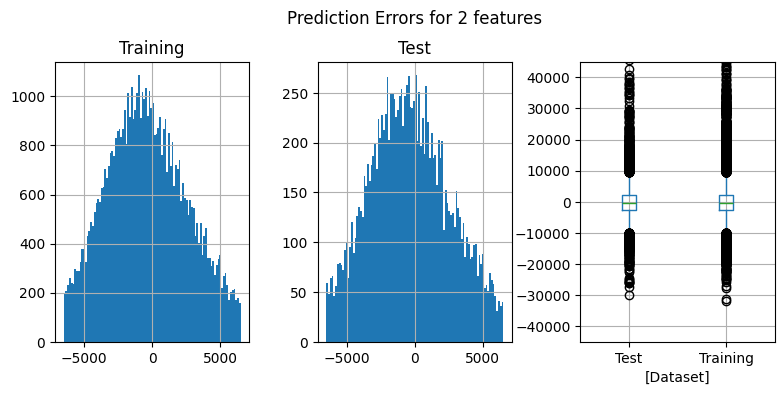




3 features - Feature Set Rows, Columns: (82853, 908)
Model Performance with 3 features:
Mean Absolute Error (MAE):  2831.677636164789
Mean Squared Error  (MSE):  15157196.435090603
R2 Score             (R2):  0.9125123598091003
Execution Time: 1.7 seconds



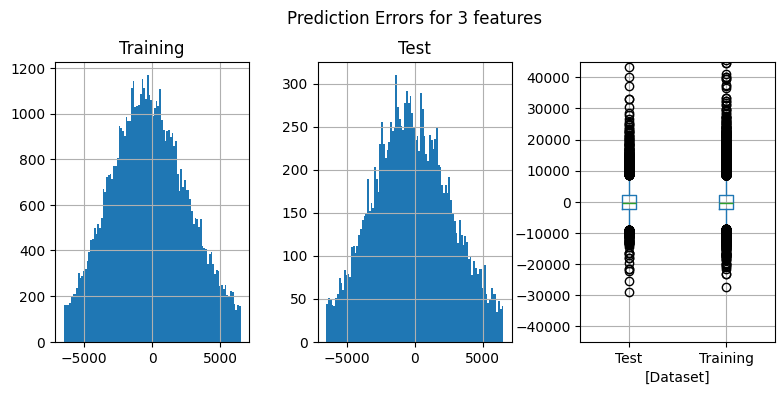




4 features - Feature Set Rows, Columns: (82853, 909)
Model Performance with 4 features:
Mean Absolute Error (MAE):  2418.6988811431916
Mean Squared Error  (MSE):  11856418.500674639
R2 Score             (R2):  0.9315645158930377
Execution Time: 1.8 seconds



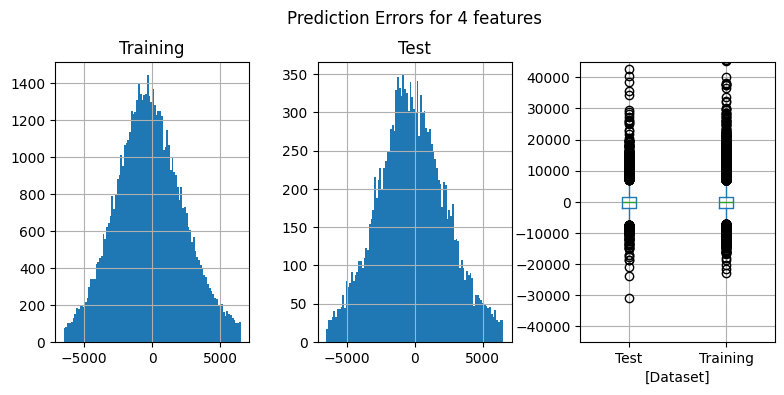




5 features - Feature Set Rows, Columns: (82853, 919)
Model Performance with 5 features:
Mean Absolute Error (MAE):  2316.318120921315
Mean Squared Error  (MSE):  11014777.464551052
R2 Score             (R2):  0.9364224847432537
Execution Time: 1.9 seconds



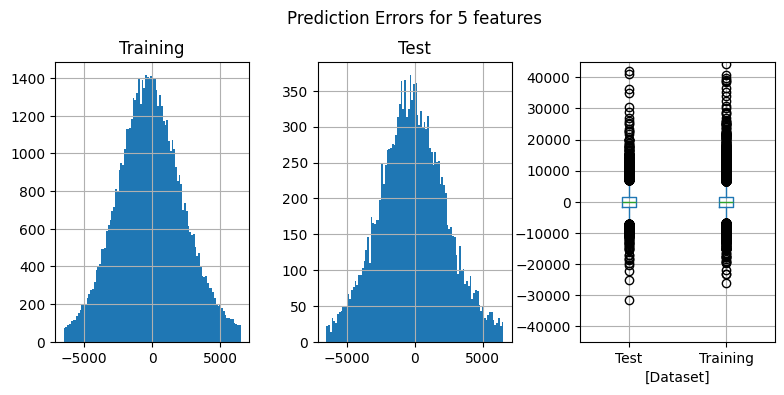




6 features - Feature Set Rows, Columns: (82853, 929)
Model Performance with 6 features:
Mean Absolute Error (MAE):  2236.8116024064066
Mean Squared Error  (MSE):  10459830.546105463
R2 Score             (R2):  0.9396256494270349
Execution Time: 1.8 seconds



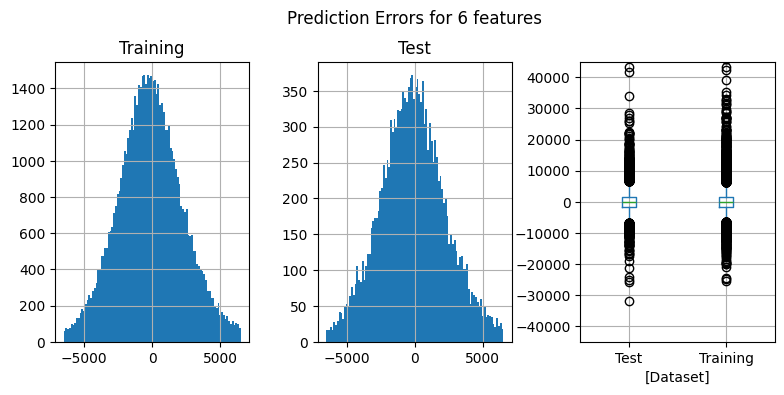




7 features - Feature Set Rows, Columns: (82853, 980)
Model Performance with 7 features:
Mean Absolute Error (MAE):  2216.44419821337
Mean Squared Error  (MSE):  10367387.055782594
R2 Score             (R2):  0.9401592350973133
Execution Time: 2.0 seconds



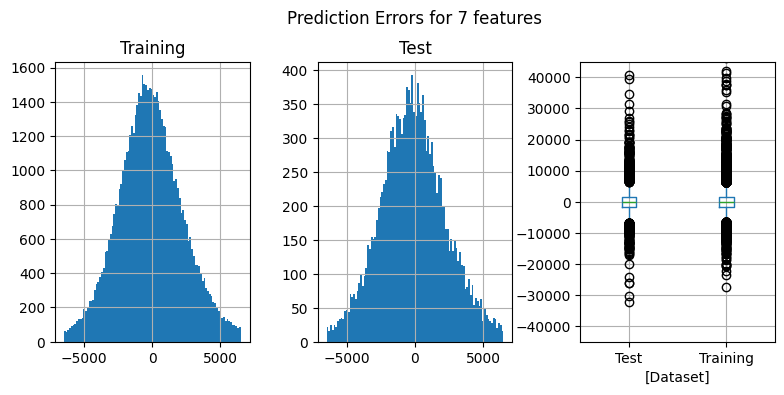




8 features - Feature Set Rows, Columns: (82853, 4191)
Model Performance with 8 features:
Mean Absolute Error (MAE):  2201.7800213263195
Mean Squared Error  (MSE):  10192004.88482754
R2 Score             (R2):  0.9411715444867259
Execution Time: 9.3 seconds



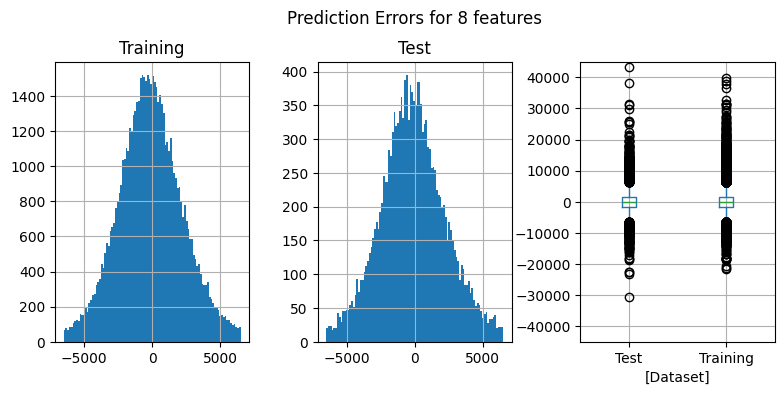

In [ ]:
# Define feature combinations
top_performing_features = {
    "2 features": ['Year', 'Model'],
    "3 features": ['Year', 'Model', 'Trim'],
    "4 features": ['Year', 'Model', 'Mileage', 'Trim'],
    "5 features": ['Year', 'Model', 'Mileage', 'Trim', 'Make'],
    "6 features": ['Year', 'Model', 'Mileage', 'Trim', 'Make', 'Body Style'],
    "7 features": ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style'],
    "8 features": ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style', 'City']
}


for name, features in top_performing_features.items():
    # Prepare data
    X = pd.get_dummies(df_cars[features], drop_first=False).values
    y = df_cars['Price'].values.reshape(-1, 1)

    # Preserve column names
    column_names = pd.get_dummies(df_cars[features], drop_first=False)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns)

    # Display dataset count
    print(f"{name} - Feature Set Rows, Columns: {X_scaled.shape}")

    # Split data 
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

    # Train the model
    start_time = time.time()
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train.ravel())
    elapsed_time = time.time() - start_time

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"\033[1mModel Performance with {name}:\033[0m")
    print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred))
    print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred))
    print(f"Execution Time: {elapsed_time:.1f} seconds\n")

    # Predict training and test data
    train_predictions = model.predict(X_train).flatten()
    test_predictions = model.predict(X_test).flatten()

    # Calculate residuals
    pred_error_train = pd.DataFrame({'Residual': y_train.flatten() - train_predictions, 'Dataset': 'Training'})
    pred_error_test = pd.DataFrame({'Residual': y_test.flatten() - test_predictions, 'Dataset': 'Test'})

    # Combine residuals for boxplot
    boxdata_df = pd.concat([pred_error_train, pred_error_test], ignore_index=True)

    # Subplots for residuals histograms and boxplot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
    common_params = {'bins': 100, 'range': [-6500, 6500]}
    pred_error_train.hist(ax=axes[0], **common_params)
    pred_error_test.hist(ax=axes[1], **common_params)
    boxdata_df.boxplot(ax=axes[2], by='Dataset')

    # Configure and display plots
    axes[0].set_title('Training')
    axes[1].set_title('Test')
    axes[2].set_title('')
    axes[2].set_ylim(-45000, 45000)
    plt.suptitle(f'Prediction Errors for {name}')
    plt.subplots_adjust(bottom=0.15, top=0.85, wspace=0.35)
    plt.show()
    print('\n\n')

### Conclusion - Feature Engineering

The analysis demonstrates that using 7 features strikes the best balance between model performance and simplicity. The final model, with 7 features, achieves a slightly lower MAE and MSE than the model with 6 features while maintaining a high R2 score. Although adding an 8th feature provides marginally better performance, the complexity introduced by the "City" feature, which expands the feature set to 4,191 columns, outweighs the benefits. Limiting the model to 7 features results in a more efficient model with 980 columns, balancing accuracy and computational efficiency. Therefore, the 7-feature model is selected for the final implementation.

# Model Comparison -*Legacy*-

### Objective
The objective of this notebook is to compare the performance of various machine learning models for predicting car prices, identifying the top-performing models for further optimization.

### Summary
The comparison of six machine learning models revealed that Random Forest and XGBoost were the top performers. Random Forest exhibited the best overall performance, while XGBoost showed potential for improvement through hyperparameter tuning.

#### **Key Findings**
- **Random Forest:**
  - Mean Absolute Error (MAE): 1,824.63
  - Mean Squared Error  (MSE): 8,395,572.97
  - R2 Score             (R2): 0.9515
  - **Performance Summary:** Random Forest outperformed the other models overall, demonstrating the lowest MAE and MSE, indicating higher accuracy and better generalization.
<br>
<br>

- **XGBoost:**
  - Mean Absolute Error (MAE): 2,216.44
  - Mean Squared Error  (MSE): 10,367,387.06
  - R2 Score             (R2): 0.9402
  - **Performance Summary:** XGBoost showed competitive performance with a slightly lower R2 score compared to Random Forest. However, it is known for responding well to hyperparameter tuning, which could potentially improve its performance.


#### Process Data - Model Comparison

In [ ]:
# Define features and X, y
features = ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style', 'City'] 
# City increase features by more than 3,000
column_names = pd.get_dummies(df_cars[features], drop_first=False) # Fixes numpy array error

X = pd.get_dummies(df_cars[features], drop_first=False).values
y = df_cars['Price'].values.reshape(-1)

# Define scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns) # Convert back to DataFrame to maintain column names

# Split data into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=1)

print('Data imported & processed')
print('Train & Test Data Row, Column Count:', X_train.shape, X_test.shape)

Data imported & processed
Train & Test Data Row, Column Count: (66316, 4221) (16579, 4221)


### XGBoost Regressor

In [ ]:
# Track training time
start_time = time.time()

# Train random forest regression model
XGBoost_model = xgb.XGBRegressor()
XGBoost_model.fit(X_train, y_train.ravel())
pred_XGBoost = XGBoost_model.predict(X_test)

# Print performance
print("\033[1mXGBoost Regression Performance:\033[0m")
print(f'Mean Absolute Error (MAE): $ {metrics.mean_absolute_error(y_test, pred_XGBoost):,.2f}')
print(f'Mean Squared Error  (MSE): {int(metrics.mean_squared_error(y_test, pred_XGBoost)):,}')
print(f'R2 Score             (R2): {metrics.r2_score(y_test, pred_XGBoost):.4f}')

# Print model execution time
end_time = time.time()
elapsed_time = (end_time - start_time)
print(f"{elapsed_time:.1f} seconds to execute.")

XGBoost Regression Performance:
Mean Absolute Error (MAE): $ 2,247.27
Mean Squared Error  (MSE): 11,244,244
R2 Score             (R2): 0.9354
9.9 seconds to execute.


### Random Forest Regressor

In [ ]:
# Track training time
start_time = time.time()

# Train random forest regression model
RF_model = RandomForestRegressor(n_jobs=-1)
RF_model.fit(X_train,y_train.ravel())
pred_RF = RF_model.predict(X_test)

# Print performance
print("\033[1mRandom Forest Regression Performance:\033[0m")
print(f'Mean Absolute Error (MAE): $ {metrics.mean_absolute_error(y_test, pred_RF):,.2f}')
print(f'Mean Squared Error  (MSE): {int(metrics.mean_squared_error(y_test, pred_RF)):,}')
print(f'R2 Score             (R2): {metrics.r2_score(y_test, pred_RF):.4f}')

# Print model execution time
end_time = time.time()
elapsed_time = (end_time - start_time)
print(f"{elapsed_time:.1f} seconds to execute.")

Random Forest Regression Performance:
Mean Absolute Error (MAE): $ 1,832.50
Mean Squared Error  (MSE): 9,145,979
R2 Score             (R2): 0.9475
338.0 seconds to execute.


### Conclusion - Model Comparison
The Random Forest model had the best overall performance, with the lowest error metrics and the highest R2 score, making it a strong candidate for predicting car prices. However, the XGBoost model, despite slightly higher error metrics, demonstrated a competitive R2 score, suggesting it captures a substantial amount of variance. Given XGBoost’s potential for significant improvements through hyperparameter tuning, I have decided to move forward with optimizing both the Random Forest and XGBoost models. The goal is to achieve the highest possible predictive performance by fine-tuning these models and comparing their performance post-optimization.

# Model Optimization -*Legacy*-

#### Process Data - Model Optimization

In [ ]:
# Define and maintain column names
seven_features = ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style']
column_names = pd.get_dummies(df_cars[seven_features], drop_first=False) 

# Define features and target, encode features
X = pd.get_dummies(df_cars[seven_features], drop_first=False).values
y = df_cars['Price'].values.reshape(-1,1)

# Scale features
scaler_encoded = StandardScaler()
X_scaled = scaler_encoded.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns) 

# Attach the column names to the scaler and save
scaler_encoded.column_names = column_names
joblib.dump(scaler_encoded, 'scaler_encoded.pkl')
joblib.dump(column_names.columns.tolist(), 'encoded_feature_names.pkl')


# Split data, 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.8, random_state=1)

# Print data split
print('Data imported & processed')
print('Train & Test Data Row, Column Count:', X_train.shape, X_test.shape)

Data imported & processed
Train & Test Data Row, Column Count: (66316, 1009) (16579, 1009)


In [ ]:
# Train random forest regressor model
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train,y_train.ravel())

# Train xgboost regressor model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train.ravel())

print('Models trained')

Models trained


### Optimize with Hyperparameters Tuning

During model comparison these were the best two performing models. 

Utilizing randomized search for speed vs gridsearch. 

Using 7 features as it was much more efficient to optimize models and early feature engineering with XGBoost showed 7 features to be the best combination of accuracy and efficiency.

#### XGBoost RandomSearchCV

In [ ]:
# Define xgboost parameter search
parameters_xgb = {
    'n_estimators': [100, 250, 500, 1000],
    'max_depth': [5, 15, 25],
    'learning_rate': [0.1, 0.2, 0.25, .35, .5],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.85, 0.9, 0.95, 1.0],
    'min_child_weight': [1, 2, 3, 5],
    'reg_alpha': [0, 0.0001, 0.001],
    'reg_lambda': [10, 20, 25]
}

# Track training time
start_time = time.time()

# Perform RandomizedSearch with cross-validation
random_search_xgb = RandomizedSearchCV(
    xgboost_model, 
    param_distributions=parameters_xgb, 
    n_iter=150, 
    cv=5, 
    scoring='neg_mean_squared_error',
    random_state=1,
)

# Fit xgb model with best hyperparameters
optimized_xgb = random_search_xgb.fit(X_train, y_train.ravel())

# Predict test data
pred_optimized_xgb = optimized_xgb.predict(X_test)

# Print best hyperparameters
print("Best Hyperparameters:", optimized_xgb.best_params_)
print('\n')

# Print optimized xgb model performance
print("\033[1mOptimized XGBoost Model Performance:\033[0m")
print(f'Mean Absolute Error (MAE): $ {metrics.mean_absolute_error(y_test, pred_optimized_xgb):,.2f}')
print(f'Mean Squared Error  (MSE): {int(metrics.mean_squared_error(y_test, pred_optimized_xgb)):,}')
print(f'R2 Score             (R2): {metrics.r2_score(y_test, pred_optimized_xgb):.4f}')

# Print search execution time
end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print(f"{elapsed_time:.1f} minutes to execute.")

Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 20, 'reg_alpha': 0.0001, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.85}

Optimized XGBoost Model Performance:
Mean Absolute Error (MAE): $ 1,680.11
Mean Squared Error  (MSE): 6,899,667
R2 Score             (R2): 0.9604
397.3 minutes to execute.


#### Random Forest RandomSearchCV

In [ ]:
# Define random forest parameter search
parameters_rf = {
    'n_estimators': [100, 250, 500, 1000],
    'max_depth': [5, 25, 50, 100, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2', 0.5, 1],
    'bootstrap': [True, False]
}

# Track training time
start_time = time.time()

# Perform randomizedsearch with cross-validation
random_search_rf = RandomizedSearchCV(
    rf_model, 
    param_distributions=parameters_rf, 
    n_iter=150, 
    cv=5, 
    scoring='neg_mean_squared_error', # MSE performed better than MAE on earilier iterations(handles variance better specifically)
    random_state=1
)

# Fit rf model with best hyperparameters
optimized_rf = random_search_rf.fit(X_train, y_train.ravel())

# Predict test data
pred_optimized_rf = optimized_rf.predict(X_test)

# Print best hyperparameters
print("Best Hyperparameters:", optimized_rf.best_params_)
print('\n')

# Print optimized rf model performance
print('\033[1mOptimized Random Forest Model Performance:\033[0m')
print(f'Mean Absolute Error (MAE): $ {metrics.mean_absolute_error(y_test, pred_optimized_rf):,.2f}')
print(f'Mean Squared Error  (MSE): {int(metrics.mean_squared_error(y_test, pred_optimized_rf)):,}')
print(f'R2 Score             (R2): {metrics.r2_score(y_test, pred_optimized_rf):.4f}')

# Print search execution time
end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print(f"{elapsed_time:.1f} minutes to execute.")

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

Optimized Random Forest Model Performance:
Mean Absolute Error (MAE): $ 1,721.03
Mean Squared Error  (MSE): 7,707,705
R2 Score             (R2): 0.9557
677.9 minutes to execute.


## Best Performing Model (XGBoost)

In [ ]:
# Define final optimized xgb model with the best hyperparameters tested
best_hyperparams_xgb = {
    'subsample': 0.8, 
    'reg_lambda': 20, 
    'reg_alpha': 0.0001, 
    'n_estimators': 1000, 
    'min_child_weight': 1, 
    'max_depth': 5, 
    'learning_rate': 0.5, 
    'colsample_bytree': 0.85
}

# Track training time
start_time = time.time()

# Train final optimized xgb model
initial_best_model = xgb.XGBRegressor(**best_hyperparams_xgb)
initial_best_model.fit(X_train, y_train.ravel())

# Predict test data
pred_initial_best_model = initial_best_model.predict(X_test)

# Print optimized xgb model performance
print('\033[1mInitial Best Model (XGBoost) Performance:\033[0m')
print(f'Mean Absolute Error (MAE): $ {metrics.mean_absolute_error(y_test, pred_initial_best_model):,.2f}')
print(f'Mean Squared Error  (MSE): {int(metrics.mean_squared_error(y_test, pred_initial_best_model)):,}')
print(f'R2 Score             (R2): {metrics.r2_score(y_test, pred_initial_best_model):.4f}')

# Print model execution time
end_time = time.time()
elapsed_time = (end_time - start_time)
print(f"{elapsed_time:.1f} seconds to execute.")

# Print initial xgb performance
print("\n\033[1mPreliminary XGBoost Regression Performance:\033[0m")
print('Mean Absolute Error (MAE): $ 2,253.15')
print('Mean Squared Error  (MSE): 11,258,357')
print('R2 Score             (R2): 0.9353')

# Save final optimized xgb model
joblib.dump(initial_best_model, 'legacy_model.pkl')

Initial Best Model (XGBoost) Performance:
Mean Absolute Error (MAE): $ 1,680.11
Mean Squared Error  (MSE): 6,899,667
R2 Score             (R2): 0.9604
13.3 seconds to execute.

Preliminary XGBoost Regression Performance:
Mean Absolute Error (MAE): $ 2,253.15
Mean Squared Error  (MSE): 11,258,357
R2 Score             (R2): 0.9353


['legacy_model.pkl']

# Model Evaluation -*Legacy*-

### **Objective**
The objective of this notebook was to evaluate the model's performance and assess the risk of overfitting.

### **Summary**
The initial cross-validation revealed highly inconsistent results, which raised concerns about potential overfitting. Further analysis of the target variable distribution confirmed an imbalance, particularly in higher price ranges, leading to skewed performance metrics.

To correct this, a stratified KFold cross-validation approach was applied. This method involved binning the target variable to ensure a more balanced distribution across folds while continuing to test predictions on the original target values. The results from this stratified approach demonstrated more consistent and reliable performance metrics, highlighting the model’s resilience and further refining its predictive accuracy.

#### **Key Findings**
- **Mean Absolute Error (MAE):**
  - Original Cross-Validation (before stratification): Results were highly variable, suggesting potential overfitting.
  - Stratified Cross-Validation MAE Scores: The implementation of stratified cross-validation led to a more consistent set of MAE scores across the folds.
  - Average MAE after Stratification: **\$1,662.70**, which is within 10% of the standard deviation (13,173) of the target variable, indicating robust performance across different data splits.

- **Mean Squared Error (MSE):**
  - Stratified Cross-Validation MSE Scores: While shwoing some variablity, the MSE scores were more consistent than those obtained from the initial, unstratified cross-validation.
  - Average MSE after Stratification: **6,506,722**, showing a reduction in larger errors compared to earlier results.

- **R² Score:**
  - Stratified Cross-Validation R² Scores: The R² scores were consistently high across the folds.
  - Average R² after Stratification: **0.9625**, indicating that the model consistently captures a significant portion of the variance in the data, reinforcing that the strong performance is not due to overfitting.

### Cross-Validation 

In [ ]:
# Load data 
df_cars = pd.read_csv('cleaned_data_july_21st.csv')  

# Load previous final model and scaler, xgboost
old_model = joblib.load('encoded_cars_xgb_model.pkl')
old_scaler = joblib.load('scaler_encoded.pkl')
old_feature_names = joblib.load('encoded_feature_names.pkl')

# Define features and target, encode features
X_old = pd.get_dummies(df_cars[features], drop_first=False).values
y_old = df_cars['Price'].values.reshape(-1,1)

# Scale features
X_old = old_scaler.fit_transform(X_old)
X_old = pd.DataFrame(X_old, columns=old_feature_names) 

# Run cross-validation
cv_old = cross_val_score(old_model, X_old, y_old, cv=10, scoring='neg_mean_absolute_error')

# Print cross-validation MAE performance
print('\n\033[1mOld Model Cross-Validation MAE Performance:\033[0m')
print('MAE Scores for each Fold:', [-round(score, 2) for score in cv_old])
print('\033[1mAverage Mean Absolute Error (MAE):\033[0m $', round(-cv_old.mean(), 2))

# Stratified cross-validation
scores = cross_validate(old_model, X_old, y_old, cv=skf.split(X_old, y_binned), scoring=scoring)

# MAE, MSE, R2 performance for each fold
print('\n\033[1mOld Model Stratified Cross-Validation Performance:\033[0m')
print('Stratified MAE Scores:', [-round(score, 2) for score in scores['test_MAE']])
print('Stratified MSE Scores:', [-int(round(score)) for score in scores['test_MSE']])
print('Stratified R² Scores:', [round(score, 4) for score in scores['test_R2']])

# Average MAE, MSE, R2 performance across all folds
print('\n\033[1mOld Model Average Stratified Cross-Validation Performance:\033[0m')
print(f'Avgerage Stratified Mean Absolute Error (MAE): $ {-scores["test_MAE"].mean():,.2f}')
print(f'Avgerage Stratified Mean Squared Error  (MSE): {int(-scores["test_MSE"].mean()):,}')
print(f'Avgerage Stratified R2 Score             (R2): {scores["test_R2"].mean():.4f}')

# Print orignal model performance
print("\n\033[1mOld Best Model (Encoded XGBoost) Performance:\033[0m")
print('Mean Absolute Error (MAE):  $ 1680.11')
print('Mean Squared Error  (MSE):  6,899,668')
print('R2 Score             (R2):  0.9604')


Old Model Cross-Validation MAE Performance:
MAE Scores for each Fold: [3974.98, 3915.97, 2858.53, 2565.13, 4817.05, 2974.14, 2217.77, 2235.29, 1915.09, 5141.37]
Average Mean Absolute Error (MAE): $ 3261.53

Old Model Stratified Performance:
Stratified MAE Scores: [1688.46, 1685.18, 1653.27, 1644.63, 1667.18, 1669.85, 1658.84, 1661.38, 1655.03, 1643.18]
Stratified MSE Scores: [6960436, 6719044, 6381328, 6419415, 6779990, 6690863, 6274478, 6493553, 6167230, 6180884]
Stratified R² Scores: [0.9607, 0.9619, 0.9627, 0.9628, 0.9606, 0.9616, 0.9641, 0.9619, 0.9646, 0.9643]

Old Model Average Stratified Cross-Validation Performance:
Avgerage Stratified Mean Absolute Error (MAE): $ 1,662.70
Avgerage Stratified Mean Squared Error  (MSE): 6,506,722
Avgerage Stratified R2 Score             (R2): 0.9625

Old Best Model (Encoded XGBoost) Performance:
Mean Absolute Error (MAE):  $ 1680.11
Mean Squared Error  (MSE):  6,899,668
R2 Score             (R2):  0.9604


### Conclusion - Model Evaluation
The stratified cross-validation results indicate that my model performs even better over more balanced splits of the data, achieving an average MAE of $1,663 and an R² score of 0.9625. This improvement over the original test set performance suggests that the model is well-tuned and not overfitting, as the high R² score is consistent with the more balanced dataset.

The MAE of $1,663 is less than 10% of the standard deviation in the prices, which further demonstrates the model's robustness and accuracy. Given that it has been a few weeks since the original data collection, the next logical step would be to introduce new data to the model to test its adaptability to market fluctuations, particularly in the car market, which is known for its volatility.

I believe that through careful optimization and hyperparameter tuning, the model is well-equipped to provide reliable pricing predictions.

# Model Validation -*Legacy*-

### **Objective**
To validate the performance of the XGBoost model on new data collected nearly a month after the original training data. The objective is to assess the model’s robustness in predicting car prices amidst significant market fluctuations, ensuring its effectiveness as a pricing optimization tool over time.

### **Summary**
In this notebook, the XGBoost model trained on data from July 21st was evaluated using new data from August 16th. Given the month-long gap, significant changes in the market were expected to impact the model’s performance. This validation process involved aligning and scaling the new data with the original training features, followed by a comparison of the model's predictive accuracy on both datasets.

#### **Key Findings**
- **Mean Absolute Error (MAE):**
  - Original Data (July 21st): **\$1,680.10**
  - Validation Data (August 16th): **\$2,760.09**
  - **Comparison:** The MAE increased by \$1,079.98, reflecting market fluctuations over the past month. The error remains within a reasonable range, representing approximately **21.12%** of the standard deviation of prices in the validation set.


<br>

- **Mean Squared Error (MSE):**
  - Original Data (July 21st): **6,899,668**
  - Validation Data (August 16th): **21,093,687**
  - **Comparison:** The MSE more than tripled, highlighting a significant rise in larger errors. This increase underscores the effect of market shifts on the model's prediction accuracy.

<br>

- **R2 Score:**
  - Original Data (July 21st): **0.9604**
  - Validation Data (August 16th): **0.8765**
  - **Comparison:** The R2 score dropped by 0.084, indicating a reduction in the model's ability to explain the variance in car prices. Despite this, the R2 score remains relatively strong, suggesting that the model still captures most of the variance in the data.

<br>

- **Data Set Size Consideration:**
  - The validation set consisted of **9,229** samples, compared to **66,282** for training and **16,571** for testing in the original data. The smaller size of the validation set could contribute to higher variability in performance metrics, as it may not fully capture the range of conditions seen in the larger training set.

In [ ]:
# Load intial best model and scaler
legacy_model = joblib.load('legacy_model.pkl')
legacy_scaler = joblib.load('legacy_scaler.pkl')
legacy_features = joblib.load('legacy_encoded_feature_names.pkl')

print('Models and scalers loaded')

Models and scalers loaded


### Apply Model to Validaton Data

In [ ]:
# Encode features for X
X_validation_encoded = pd.get_dummies(df_validation[features], drop_first=False)

# Reindex for column names
X_validation_encoded = X_validation_encoded.reindex(columns=encoded_feature_names, fill_value=0)

# Scale with saved scaler
X_validation_scaled = encoded_scaler.transform(X_validation_encoded.values)

# Predict validation set
pred_initial_model = encoded_model.predict(X_validation_scaled)

# Print validation data performance
print("\033[1mIntial Best Model (Encoded XGBoost) Performance on Validation Data from 8/15:\033[0m")
print(f'Mean Absolute Error (MAE): $ {round(metrics.mean_absolute_error(y_validation, pred_initial_model), 2):,}')
print(f'Mean Squared Error  (MSE): {int(round(metrics.mean_squared_error(y_validation, pred_initial_model))):,}')
print(f'R2 Score             (R2): {round(metrics.r2_score(y_validation, pred_initial_model), 4)}')

# Print initial best model on original data performance
print("\n\033[1mOld Best Model (Encoded XGBoost) Performance on Original Data from 7/26:\033[0m")
print('Mean Absolute Error (MAE):  $ 1680.11')
print('Mean Squared Error  (MSE):  6,899,668')
print('R2 Score             (R2):  0.9604')

Intial Best Model (Encoded XGBoost) Performance on Validation Data from 8/15:
Mean Absolute Error (MAE): $ 2,760.09
Mean Squared Error  (MSE): 21,093,687
R2 Score             (R2): 0.8765

Intial Best Model (Encoded XGBoost) Performance on Original Data from 7/26:
Mean Absolute Error (MAE):  $ 1680.11
Mean Squared Error  (MSE):  6,899,668
R2 Score             (R2):  0.9604


### Conclusion - Model Validation

The validation confirms that while the XGBoost model experiences a decline in performance when applied to new data collected during a period of market volatility, it still provides reasonably accurate predictions. The increase in error metrics is a natural consequence of the market changes, and the smaller validation set may also contribute to this variability. Nonetheless, the model’s performance remains within an acceptable range, validating its continued use as a pricing optimization tool. To ensure sustained accuracy, it is recommended that the model be periodically retrained with updated data, particularly in rapidly changing market environments.